In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
milk = pd.read_csv('https://github.com/plotly/datasets/raw/master/monthly-milk-production-pounds.csv',index_col = 'Month')

In [3]:
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [4]:
milk.index = pd.to_datetime(milk.index)

<Axes: xlabel='Month'>

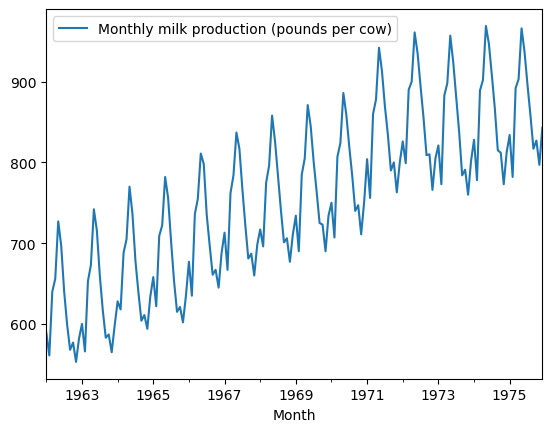

In [5]:
milk.plot()

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Monthly milk production (pounds per cow)  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
milk.describe()

,Monthly milk production (pounds per cow)
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [8]:
train_set = milk.head(156)  #12 month * 13
test_set = milk.tail(12)    #12 month

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.fit_transform(test_set)

In [11]:
def next_batch(trainging_batch , batch_size , steps):

    #Grab a random starting point for each batch
    rand_starrt = np.random.radint(0,len(training_data)-steps)

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start + steps + 1].reshape(1 , steps + 1))
    
    return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,:1].reshape(-1,steps,1)

In [16]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached o

In [18]:
import tensorflow as tf

In [20]:
num_inputs = 1
num_time_steps = 12

num_neurals = 100

num_output = 1

learning_rate = 0.03

num_train_itrations = 4000

batch_size = 1

In [70]:
# placeholders for x y
x = tf.Variable(initial_value = 12 , dtype = tf.float32)
y = tf.Variable(initial_value = 12 , dtype = tf.float32)

In [72]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.GRUCell(num_units = num_neuros , activation = tf.nn.relu,output_size = num_outputs))

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [66]:
loss = tf.reduce_mean(tf.square(new_output - y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss)

NameError: name 'outputs' is not defined

In [74]:
init = tf.global_variable_initializer()  # Global variable

AttributeError: module 'tensorflow' has no attribute 'global_variable_initializer'

In [ ]:
saver = tf.train.Server()  # tf.server()

In [ ]:
# Create session and run it
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_train_iterations):
        x_batch , y_batch = next_batch(train_scaled , batch_size , num_time_steps)
        sess.run(train , feed_dict = {X : x_batch , Y : y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict = {X : x_batch , Y : y_batch})
            print(iterastion , "\tMSE:" , mse)

    saver.save(sess , "./ex_time_series_model")

In [ ]:
train_test

In [ ]:
with tf.Session() as sess :
    saver.restore(sess , ".ex_time_series_model")
    train_seed = list(train_scaled[-12 : ])

    for iteration in range(12):
        x_batch = np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps , 1)
        y_pred = sess.run(outputs , feed_dict = {X: x_batch})
        train_seed.append(y_pred[0,-1,0])

In [ ]:
test_seed

In [ ]:
result = scaler.inverse_transform(np.array(train_Seed[12:]).reshape(12,1))

In [ ]:
test_set['Generated'] = result

In [ ]:
test_set

In [ ]:
test_set.plot()